In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data
df = pd.read_excel(r'./raw_data.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
print(df.columns)
df.columns = df.columns.str.lower()
print(df.columns)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
Index(['airline', 'date_of_journey', 'source', 'destination', 'route',
       'dep_time', 'arrival_time', 'duration', 'total_stops',
       'additional_info', 'price'],
      dtype='object')


In [8]:
df.dtypes

airline            object
date_of_journey    object
source             object
destination        object
route              object
dep_time           object
arrival_time       object
duration           object
total_stops        object
additional_info    object
price               int64
dtype: object

**All are categorical columns**

In [10]:
df['airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [12]:
df['additional_info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [14]:
df['arrival_time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [16]:
df['date_of_journey'].unique() 

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [19]:
df['dep_time'].unique()[:30]

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35'], dtype=object)

In [22]:
df['duration'].unique()[:10]

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m'], dtype=object)

In [24]:
df['source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [25]:
df['destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [26]:
df['total_stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

**Null values**

In [28]:
df.isna().sum()

airline            0
date_of_journey    0
source             0
destination        0
route              1
dep_time           0
arrival_time       0
duration           0
total_stops        1
additional_info    0
price              0
dtype: int64

**dropping null values**

In [45]:
df.drop(df[(df['route'].isna()) | (df['total_stops'].isna())].index, inplace=True)
df.isna().sum()

airline            0
date_of_journey    0
source             0
destination        0
route              0
dep_time           0
arrival_time       0
duration           0
total_stops        0
additional_info    0
price              0
dtype: int64

In [51]:
print(df['additional_info'].unique().shape)
print(df['additional_info'].str.lower().unique().shape)
#so there is some typo mistake is here, No Info -> no info

(10,)
(9,)


**Applying feature engineering**

In [58]:
df['date_of_journey'] = pd.to_datetime(df['date_of_journey'], dayfirst=True)
df['date_of_journey'].head(2)

0   2019-03-24
1   2019-05-01
Name: date_of_journey, dtype: datetime64[ns]

**Here all the records are 2019 so we only create a feature for month an day**

In [62]:
print(f"The unique days are {df['date_of_journey'].dt.day.unique()}")

The unique days are [24  1  9 12 27 18  3 15  6 21]


In [64]:
print(f"The unique months are {df['date_of_journey'].dt.month.unique()}")

The unique months are [3 5 6 4]


In [65]:
df['journey_month'] = df['date_of_journey'].dt.month
df['journey_day']   = df['date_of_journey'].dt.day

In [69]:
df['total_stops'].unique() # converting this top numeric values

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [71]:
df['total_stops'] = df['total_stops'].map(
                        {'non-stop':0, '1 stop':1, 
                        '2 stops':2, '3 stops':3, '4 stops':4})
df['total_stops'].unique()

array([0, 2, 1, 3, 4])

**Duration is represented as Hour and minutes in String like 2h 15m, we need to find the total minutes
takes the flight to reach the destination, as a numeric values**

In [77]:
print(df['duration'].head(2).values)

['2h 50m' '7h 25m']


In [102]:
def calculate_duration_in_minutes(x:str) -> int :
    time = x.split(' ')

    if len(time) != 1 :
        return int(time[0].replace('h', '')) * 60 + int(time[1].replace('m', ''))
    
    return int(time[0].replace('h', '')) * 60

In [104]:
df['duration'].apply(calculate_duration_in_minutes)

ValueError: invalid literal for int() with base 10: '5m'

In [105]:
df[df['duration'] == '5m']

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,journey_month,journey_day
6474,Air India,2019-03-06,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2,no info,17327,3,6


In [106]:
df.drop(df[df['duration'] == '5m'].index, inplace = True)

In [109]:
df['duration'] = df['duration'].apply(calculate_duration_in_minutes)
df['duration'].head(2)

0    170
1    445
Name: duration, dtype: int64

In [118]:
print(df['dep_time'].str.split(':').str[0].unique())
print('It contains the record of all the 24 hours')

['22' '05' '09' '18' '16' '08' '11' '20' '21' '17' '14' '04' '07' '10'
 '15' '06' '19' '23' '13' '02' '12' '00' '01' '03']
It contains the record of all the 24 hours


In [122]:
print(df['dep_time'].str.split(':').str[1].unique())

['20' '50' '25' '05' '00' '55' '45' '40' '10' '15' '35' '30']


**Creating two new featuters hour and minutes**

In [126]:
df['dep_minute'] = df['dep_time'].str.split(':').str[1].astype(int)
df['dep_hour']   = df['dep_time'].str.split(':').str[0].astype(int)
df[['dep_time', 'dep_minute', 'dep_hour']].head(3)

,dep_time,dep_minute,dep_hour
0,22:20,20,22
1,05:50,50,5
2,09:25,25,9


**Same for arrival time also we need to create a columns for arrival hour and minute** 

In [148]:
a = '01:10 22 Mar'

def get_arrival_hour(x: str) : 
    time = x.split(' ')[0]
    return int(time.split(':')[0])

def get_arrival_minute(x: str) : 
    time = x.split(' ')[0]
    return int(time.split(':')[1])


In [150]:
df['arrival_minute'] = df['arrival_time'].apply(get_arrival_minute)
df['arrival_hour'] = df['arrival_time'].apply(get_arrival_hour)
df[['arrival_time', 'arrival_minute', 'arrival_hour']].head(3)

,arrival_time,arrival_minute,arrival_hour
0,01:10 22 Mar,10,1
1,13:15,15,13
2,04:25 10 Jun,25,4


**Dropping unncessary columns**

In [152]:
df.drop(columns=['date_of_journey', 'route', 'dep_time', 'arrival_time'], inplace=True)
df.head()

,airline,source,destination,duration,total_stops,additional_info,price,journey_month,journey_day,dep_minute,dep_hour,arrival_minute,arrival_hour
0,IndiGo,Banglore,New Delhi,170,0,no info,3897,3,24,20,22,10,1
1,Air India,Kolkata,Banglore,445,2,no info,7662,5,1,50,5,15,13
2,Jet Airways,Delhi,Cochin,1140,2,no info,13882,6,9,25,9,25,4
3,IndiGo,Kolkata,Banglore,325,1,no info,6218,5,12,5,18,30,23
4,IndiGo,Banglore,New Delhi,285,1,no info,13302,3,1,50,16,35,21


In [153]:
df.select_dtypes(include='object')

,airline,source,destination,additional_info
0,IndiGo,Banglore,New Delhi,no info
1,Air India,Kolkata,Banglore,no info
2,Jet Airways,Delhi,Cochin,no info
3,IndiGo,Kolkata,Banglore,no info
4,IndiGo,Banglore,New Delhi,no info
...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,no info
10679,Air India,Kolkata,Banglore,no info
10680,Jet Airways,Banglore,Delhi,no info
10681,Vistara,Banglore,New Delhi,no info


**Do label encoding to convert categorical into numerical**

In [157]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [164]:
df['additional_info'] = enc.fit_transform(df['additional_info'])
df['airline'] = enc.fit_transform(df['airline'])
df['source'] = enc.fit_transform(df['source'])
df['destination'] = enc.fit_transform(df['destination'])

In [165]:
df.head()

,airline,source,destination,duration,total_stops,additional_info,price,journey_month,journey_day,dep_minute,dep_hour,arrival_minute,arrival_hour
0,3,0,5,170,0,7,3897,3,24,20,22,10,1
1,1,3,0,445,2,7,7662,5,1,50,5,15,13
2,4,2,1,1140,2,7,13882,6,9,25,9,25,4
3,3,3,0,325,1,7,6218,5,12,5,18,30,23
4,3,0,5,285,1,7,13302,3,1,50,16,35,21


<Axes: ylabel='price'>

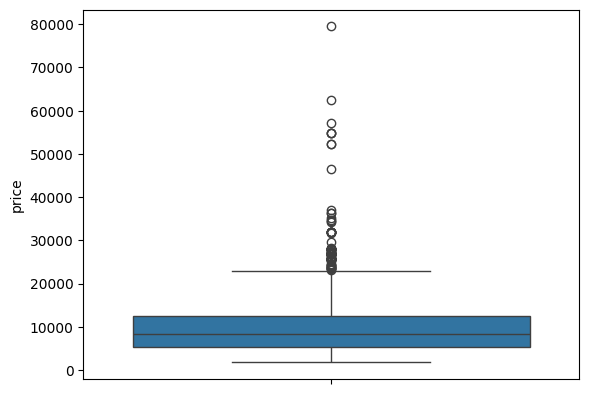

In [168]:
sns.boxplot(y=df['price'])

**contains outliers**

In [169]:
from sklearn.preprocessing import StandardScaler

In [1]:
scaler = StandardScaler()
scaler

NameError: name 'StandardScaler' is not defined

In [173]:
scaler.fit_transform(pd.DataFrame(df['price']))

array([[-1.12548281],
       [-0.30893223],
       [ 1.04005704],
       ...,
       [-0.40284097],
       [ 0.77242798],
       [ 0.578321  ]])

In [178]:
print(df['price'].head(1).values[0],'=' ,-1.12548281)

3897 = -1.12548281


In [183]:
scaler.inverse_transform([[1.12548281]])

array([[14275.88622708]])

In [190]:
scaler.fit_transform(df[['price']]).reshape(10681)

array([-1.12548281, -0.30893223,  1.04005704, ..., -0.40284097,
        0.77242798,  0.578321  ])

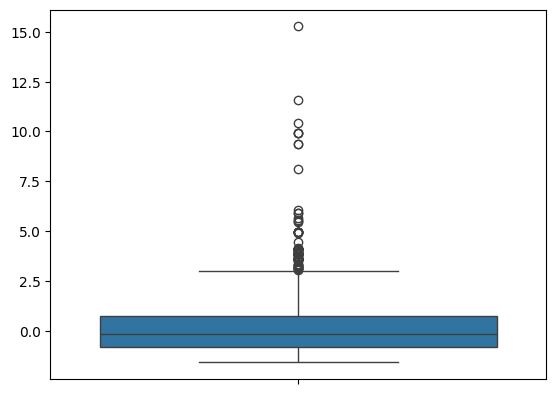

In [191]:
sns.boxplot(y=scaler.fit_transform(df[['price']]).reshape(10681));

In [201]:
df['price'] = scaler.fit_transform(df[['price']])

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [213]:
target_column= 'price'
X = df[df.columns[df.columns != target_column]]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8544, 12), (8544,), (2137, 12), (2137,))

In [216]:
X_train.head(1)

,airline,source,destination,duration,total_stops,additional_info,journey_month,journey_day,dep_minute,dep_hour,arrival_minute,arrival_hour
10611,4,4,3,85,0,5,5,18,5,7,30,8


In [218]:
estimator = RandomForestRegressor(n_estimators=50, criterion='absolute_error')
estimator.fit(X_train, y_train)
estimator.score(X_train, y_train)

0.9758889343826094

In [220]:
estimator.score(X_test, y_test) * 100

84.13006713602441

In [239]:
scaler.inverse_transform([[y_train.iloc[786]]])

array([[3100.]])

In [240]:
scaler.inverse_transform([estimator.predict([X_train.iloc[786].values])])
# [X_train.iloc[0].values]

c:\Users\HP\anaconda3\envs\sql_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([[3194.5]])

# **Work for transformation with pipelines**

In [30]:
import pandas as pd 

In [31]:
df = pd.read_excel('raw_data.xlsx')
df.columns = df.columns.str.lower()
df.head(3)

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [35]:
df.drop((df[df['route'].isna() | df['total_stops'].isna()]).index, inplace = True)

In [38]:
df.drop(df[df['duration'] == '5m'].index, inplace=True)

In [39]:
df.isna().sum().sum()

np.int64(0)

In [104]:
df.drop(columns='route', inplace=True)

In [105]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder

def extract_day_and_month(X: pd.Series) : 
    X = X.astype('datetime64[ns]')
    return pd.DataFrame(
        {
            'journey_day' : X.dt.day,
            'journey_month' : X.dt.month
        }
    )

def calculate_duration_in_minutes(duration:str) -> int :
    time = duration.split(' ')

    if len(time) != 1 :
        return int(time[0].replace('h', '')) * 60 + int(time[1].replace('m', ''))
    
    return int(time[0].replace('h', '')) * 60

def convert_duration(X: pd.Series) : 
    return X.apply(calculate_duration_in_minutes).values.reshape(-1,1)

def convert_total_stops(X: pd.Series) : 
    return X.map({'non-stop':0, '1 stop':1, 
                        '2 stops':2, '3 stops':3, '4 stops':4}).values.reshape(-1,1)

def get_arrival_info(X: pd.Series):
    hour_and_minutes = X.str.split(' ').str[0].str.split(':')
    return pd.DataFrame(
        {
            'arrival_hour' : hour_and_minutes.str[0].astype(int),
            'arrival_minute' : hour_and_minutes.str[1].astype(int)
        }
    )

def get_departure_info(X: pd.Series) :
    hour_and_minutes = X.str.split(':')
    return pd.DataFrame(
        {    
            'departure_hour' : hour_and_minutes.str[0].astype(int),
            'departure_minute' : hour_and_minutes.str[1].astype(int)
        }
    )

def get_additional_info(X: pd.Series): 
    return X.str.lower().values.reshape(-1,1)

categorical_columns = ['airline', 'source', 'destination']

additional_info_pipeline = Pipeline(
    steps=[
        ('lower', FunctionTransformer(get_additional_info)),
        ('encode', OrdinalEncoder())
    ]
)

transformer = ColumnTransformer(
    transformers=[
        ('travel_info', OrdinalEncoder(), categorical_columns),
        ('additional_info', additional_info_pipeline, 'additional_info'),
        ('duration', FunctionTransformer(convert_duration), 'duration'),
        ('total_stops', FunctionTransformer(convert_total_stops), 'total_stops'),
        ('date_features', FunctionTransformer(extract_day_and_month), 'date_of_journey'),
        ('arrival_info', FunctionTransformer(get_arrival_info), 'arrival_time'),
        ('departure_info', FunctionTransformer(get_departure_info), 'dep_time'),
    ],
    remainder='passthrough'
)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('travel_info', OrdinalEncoder(),
                                 ['airline', 'source', 'destination']),
                                ('additional_info',
                                 Pipeline(steps=[('lower',
                                                  FunctionTransformer(func=<function get_additional_info at 0x00000160E3AE7380>)),
                                                 ('encode', OrdinalEncoder())]),
                                 'additional_info'),
                                ('duration',
                                 FunctionTransformer(func=<function convert_du...
                                 FunctionTransformer(func=<function convert_total_stops at 0x00000160E3AE72E0>),
                                 'total_stops'),
                                ('date_features',
                                 FunctionTransformer(func=<function extract_day_and_month at 0x00000160E3AE7A60>),
                                 'date_of_journey'),
                                ('arrival_info',
                                 FunctionTransformer(func=<function get_arrival_info at 0x00000160E3AE4400>),
                                 'arrival_time'),
                                ('departure_info',
                                 FunctionTransformer(func=<function get_departure_info at 0x00000160E3AE4680>),
                                 'dep_time')])

In [114]:
def get_transformed_df(df: pd.DataFrame, transformer: ColumnTransformer):
    transformed_df = pd.DataFrame(transformer.transform(df),
                                columns=['airline', 'source', 'destination', 'additional_info', 
                                        'duration', 'total_stops', 'journey_day', 'journey_month',
                                        'arrival_hour','arrival_minute', 'departure_hour' ,'departure_minute',
                                        'price'])
    transformed_df.drop(columns='route', inplace=True)
    return transformed_df.astype(int)

